What happens when you start with a matrix M, and you define M’_{ij} to be the Hadamard product (sum of the element products) of M by a matrix which is mostly 0 except for a 3x3 submatrix of all (⅓) centered around (i,j)? (this is simultaneously done for all i, j. Yikes!) Test your hypothesis by doing it to an image file of your face.

In [1]:
from PIL import Image
import math
import numpy as np
from matplotlib.pyplot import imshow
%matplotlib inline

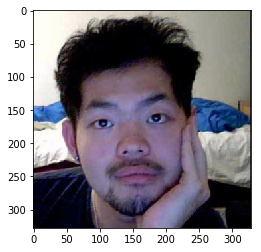

In [2]:
#original = Image.open('../image_tilt/aj_face.jpeg')
original = Image.open('yanxzhang.jpeg')
image_tensor = np.asarray(original)
# print(image_tensor, image_tensor.dtype)
imshow(image_tensor)

In [3]:
type(image_tensor), image_tensor.shape, image_tensor.dtype

(numpy.ndarray, (328, 328, 3), dtype('uint8'))

In [4]:
w = image_tensor.shape[0]
h = image_tensor.shape[1]
D = image_tensor.shape[2] # D is capital to indicate it as a constant. we won't be modifying D

In [5]:
# two = image_tensor[0:2,0:2,0] * 1/4
# print(two)
# np.sum(two)


For each pixel in the image, apply the transformation individually on each rgb layer. Note that values are capped at 255.

In [6]:
def apply_transformation(size, factor):
    """
    Applies a transformation to each pixel by 
    size: size of the matrix, positive odd integer. if even, will effectively round up to an odd integer
    factor: a ratio to multiply by
    """
    margin = int(size/2)
    transformed = np.zeros(image_tensor.shape, dtype=np.uint8) # setting dtype=np.uint8 is very important!
    for x in range(w):
        for y in range(h):
            # define the region to sample from
            x_min = x-margin if x-margin >= 0 else 0
            x_max = x+margin+1 if x+margin+1 < w else w
            y_min = y-margin if y-margin >= 0 else 0
            y_max = y+margin+1 if y+margin+1 < h else h
            # apply the transformation per rgb layer
            layers = []
            for z in range(D):
                submatrix = np.sum(image_tensor[x_min:x_max, y_min:y_max, z] * factor)
#                 print(submatrix) DEBUG
                # cap the value at 255
                submatrix = np.clip(submatrix, 0, 255)
                layers.append(submatrix)
            transformed[x_min:x_max, y_min:y_max] = np.asarray(layers) 
    return transformed

In [7]:
# def save_image(image, size, factor):
#     "Saves an image with the filename transform_sizexsize_1-factor"
#     filename = f'transform_{size}x{size}_1-{1/factor}.jpg'
#     savable = Image.fromarray(image, 'RGB')
#     image.save(savable)

Try the transformation with different parameters, matrix size and multiply factor.

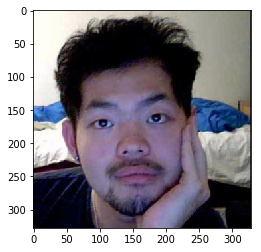

In [10]:
size = 1
factor = 1
one = apply_transformation(size,factor)
imshow(one)
#save_image(one_third)

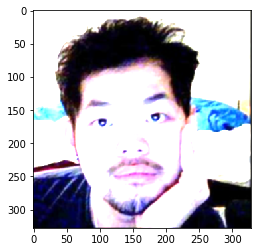

In [11]:
size = 3
factor = 1/3
one_third = apply_transformation(size,factor)
imshow(one_third)
#save_image(one_third)

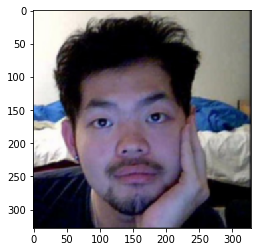

In [12]:
size = 3
factor = 1/size**2
threebythree_ninth = apply_transformation(size, factor)
imshow(threebythree_ninth)
#save_image(threebythree_ninth)

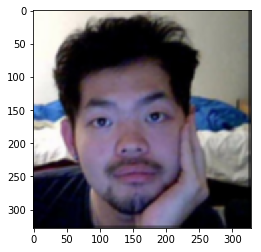

In [13]:
size = 5
factor = 1/size**2
five = apply_transformation(size, factor)
imshow(five)
#save_image(five, size, factor)

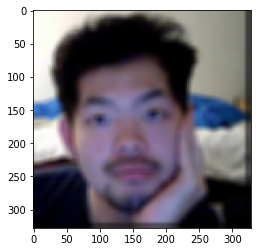

In [14]:
eleven = apply_transformation(11, 1/11**2)
imshow(eleven)


In [15]:
# size = 17
# factor = 1/17
# seventeen = apply_transformation(size, factor)
# imshow(seventeen)
# #save_image(seventeen, size, factor)

In [16]:
# size = 33
# factor = 1/33**2
# imshow(apply_transformation(size, factor))

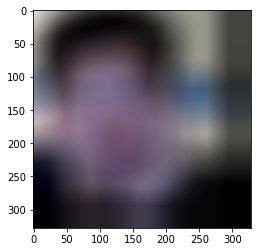

In [17]:
imshow(apply_transformation(65, 1/65**2))